# SKLearn 08 | Multiple Linear Regression & Polynomial Regression | Belajar Machine Learning Dasar

Link youtube : https://www.youtube.com/watch?v=nWJUJenAyB8

## Sample Dataset

Training Dataset

In [1]:
import pandas as pd

pizza = {'diameter' : [6, 8, 10, 14, 18],
        'n_topping' : [2, 1, 0, 2, 0],
        'harga' : [7, 9, 13, 17.5, 18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


## Testing Dataset 

In [5]:
pizza = {'diameter' : [8, 9, 11, 16, 12],
        'n_topping' : [2, 0, 2, 2, 0],
        'harga' : [11, 8.5, 15, 18, 11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


## Preprocessing Dataset 

In [8]:
# import numpy as np

x_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


In [7]:
x_test = np.array(train_pizza_df[['diameter', 'n_topping']])
y_test = np.array(train_pizza_df['harga'])

print(f'x_test:\n{x_train}\n')
print(f'y_test: {y_train}')

x_test:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_test: [ 7.   9.  13.  17.5 18. ]


## Multiple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.9153377914951989


## Polynomial Regression 

In [11]:
x_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])

print(f'x_train:\n{x_train}\n')
print(f'y_train:{y_train}')

x_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train:[ 7.   9.  13.  17.5 18. ]


## Polynomial Regression: Quadratic

Polynomial Features

In [15]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)

print(f'X_train_quadratic:\n{x_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



Training Model

In [16]:
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

LinearRegression()

Visualisasi Model

<function matplotlib.pyplot.show(close=None, block=None)>

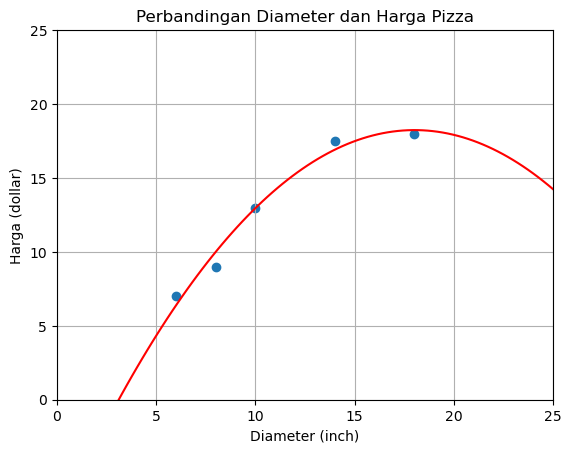

In [18]:
import matplotlib.pyplot as plt

x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)

plt.scatter(x_train, y_train)
plt.plot(x_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim (0,25)
plt.ylim (0,25)
plt.grid (True)
plt.show

## Polynomial Regression: Quadratic vs Cubic 

<function matplotlib.pyplot.show(close=None, block=None)>

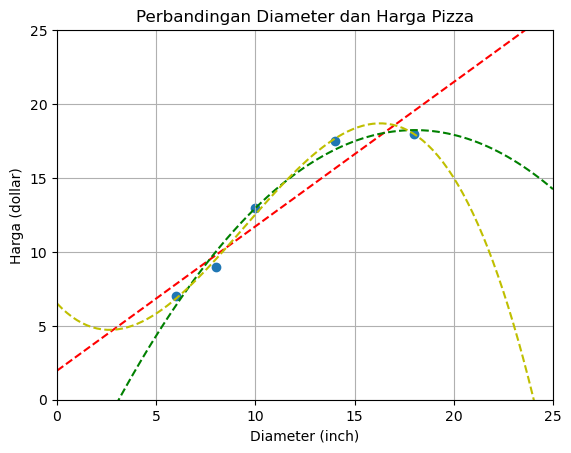

In [20]:
#training set
plt.scatter(x_train, y_train)

#linear
model = LinearRegression()
model.fit(x_train, y_train)
x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(x_vis)
plt.plot(x_vis, y_vis, '--r', label='linear')

#quadratic
quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_quadratic, y_train)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis = model.predict(x_vis_quadratic)
plt.plot(x_vis, y_vis, '--g', label='quadratic')

#cubic
cubic_feature = PolynomialFeatures(degree=3)
x_train_cubic = cubic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_cubic, y_train)
x_vis_cubic = cubic_feature.transform(x_vis)
y_vis = model.predict(x_vis_cubic)
plt.plot(x_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim (0,25)
plt.ylim (0,25)
plt.grid (True)
plt.show